In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('./PimaIndiansDiabetes.csv')

In [4]:
df.head(20)

,TimesPregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesFunct,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Graphs

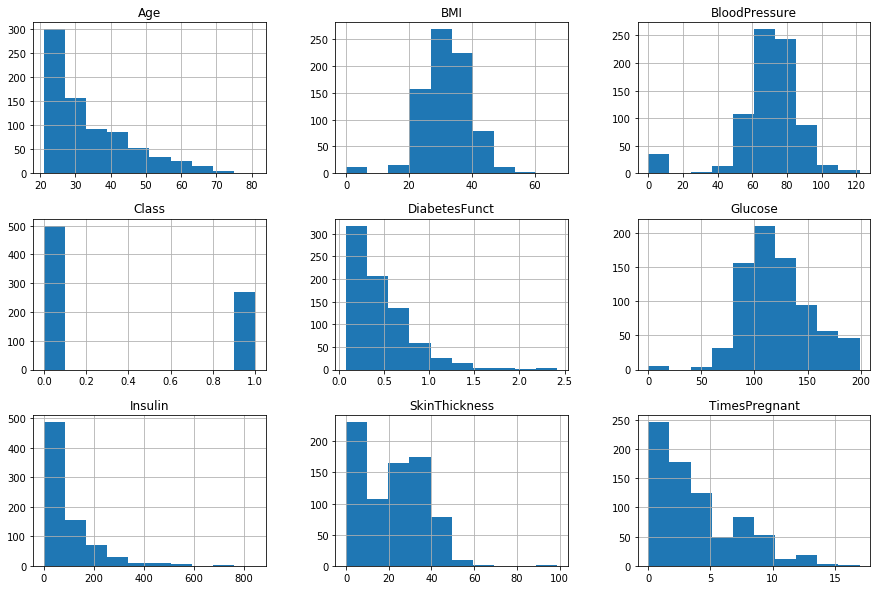

In [5]:
df.hist(bins=10,figsize=(15,10))
plt.show()

In [7]:
df.isna().sum()

TimesPregnant    0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DiabetesFunct    0
Age              0
Class            0
dtype: int64

In [8]:
# Replacing 0's with NaNs
df['Glucose'] = df['Glucose'].replace(0, )
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan) 
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan) 
df['Insulin'] = df['Insulin'].replace(0, np.nan)        
df['BMI'] = df['BMI'].replace(0, np.nan) 
df['DiabetesFunct'] = df['DiabetesFunct'].replace(0, np.nan) # useless cuz DiabetesFuct=0 for no instance
df['Age'] = df['Age'].replace(0, np.nan)# useless cuz Age=0 for no instance

In [9]:
# Replacing NaNs with means
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['DiabetesFunct'].fillna(df['DiabetesFunct'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df.head()

,TimesPregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesFunct,Age,Class
0,6,148,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.00000,168.000000,43.1,2.288,33,1


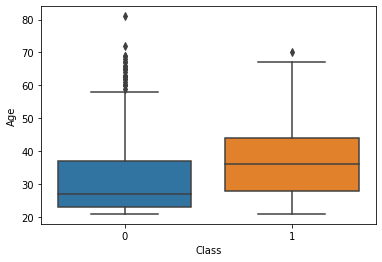

In [11]:
sns.boxplot(x='Class',y='Age' , data=df)

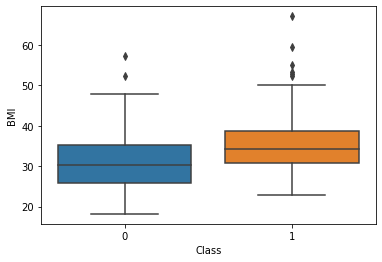

In [12]:
sns.boxplot(x='Class',y='BMI' , data=df)

In [ ]:
# Make more such boxplots for all features

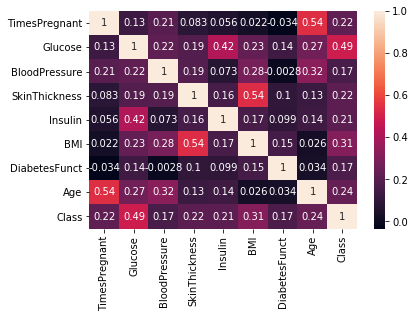

In [14]:
# Heatmap to check correlation
corr = df[df.columns].corr() #corr = correlation
sns.heatmap(corr, annot = True) #sns is used for data visualization using matplotlib

In [15]:
# Select features
X = pd.DataFrame(data = df, columns = ["TimesPregnant","Glucose","BloodPressure","SkinThickness","BMI","Age","Insulin","DiabetesFunct"])
y = pd.DataFrame(data = df, columns = ["Class"])

In [17]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
# Here try varous values for test_size such as 0.1 , 0.2 , 0.3 , 0.4

In [24]:
# Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
df.head()

,TimesPregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesFunct,Age,Class
0,6,148,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.00000,168.000000,43.1,2.288,33,1


In [26]:
X

array([[ 6.39947260e-01,  8.68061026e-01, -3.35182392e-02, ...,
         1.42599540e+00, -1.44098110e-18,  4.68491977e-01],
       [-8.44885053e-01, -1.19674723e+00, -5.29859033e-01, ...,
        -1.90671905e-01, -1.44098110e-18, -3.65060778e-01],
       [ 1.23388019e+00,  2.01517672e+00, -6.95305964e-01, ...,
        -1.05584152e-01, -1.44098110e-18,  6.04397318e-01],
       ...,
       [ 3.42980797e-01, -1.68567969e-02, -3.35182392e-02, ...,
        -2.75759658e-01, -5.12538638e-01, -6.85193357e-01],
       [-8.44885053e-01,  1.47016874e-01, -1.02619983e+00, ...,
         1.17073215e+00, -1.44098110e-18, -3.71101015e-01],
       [-8.44885053e-01, -9.34549354e-01, -1.98965170e-01, ...,
        -8.71373930e-01, -1.44098110e-18, -4.73785050e-01]])

In [27]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(X_train , y_train)
acc_NB = NBmodel.score(X_test,y_test) *100
print(acc_NB)

78.57142857142857


/home/gibraan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
actual_naive = y_test
predict_naive = NBmodel.predict(X_test)
result_naive = confusion_matrix(actual_naive , predict_naive)
print('confusion matrix => \n',result_naive)
print('\nAccuracy score => ',accuracy_score(actual_naive , predict_naive))
#print('Classification report => \n',classification_report(actual_naive,predict_naive))

confusion matrix => 
 [[92 15]
 [18 29]]

Accuracy score =>  0.7857142857142857


In [50]:
df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

(-1.1258468317413042, 1.101230806657754, -1.12995579546176, 1.1143898348979537)

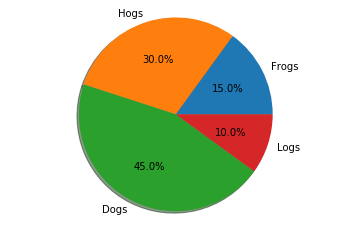

In [49]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
fig1 , ax1 = plt.subplots()
ax1.pie(sizes , labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')